In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
pd.options.display.float_format = '{:.2f}'.format
import numpy as np

In [33]:
df = pd.read_csv('file_path\\completo.csv', index_col=0)
df.index.name = 'timestamp'

In [34]:
#df

# EDA Energy generation

In [35]:
df['val_geracao'].describe()

count   34988.00
mean       87.87
std       112.10
min         0.00
25%         0.00
50%         3.12
75%       201.88
max       337.80
Name: val_geracao, dtype: float64

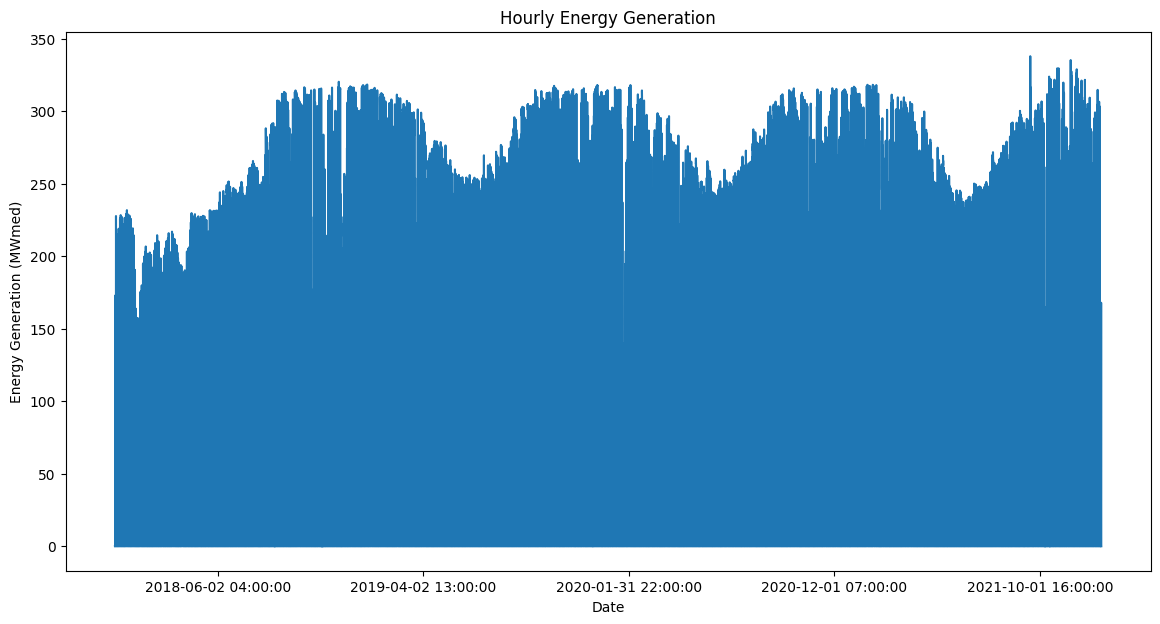

In [36]:
plt.figure(figsize=(14, 7))
plt.plot(df.index,df['val_geracao'], label='Energy Generation')
locator = mdates.AutoDateLocator(minticks=8, maxticks=10)
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
plt.title('Hourly Energy Generation')
plt.xlabel('Date')
plt.ylabel('Energy Generation (MWmed)')
plt.show()

In [65]:
df['dia']= df.index.day
df['ano']= df.index.year
df['mes']= df.index.month



In [72]:
df_avg = df.groupby(['dia','ano','mes']).max()
df_avg = df_avg.reset_index()

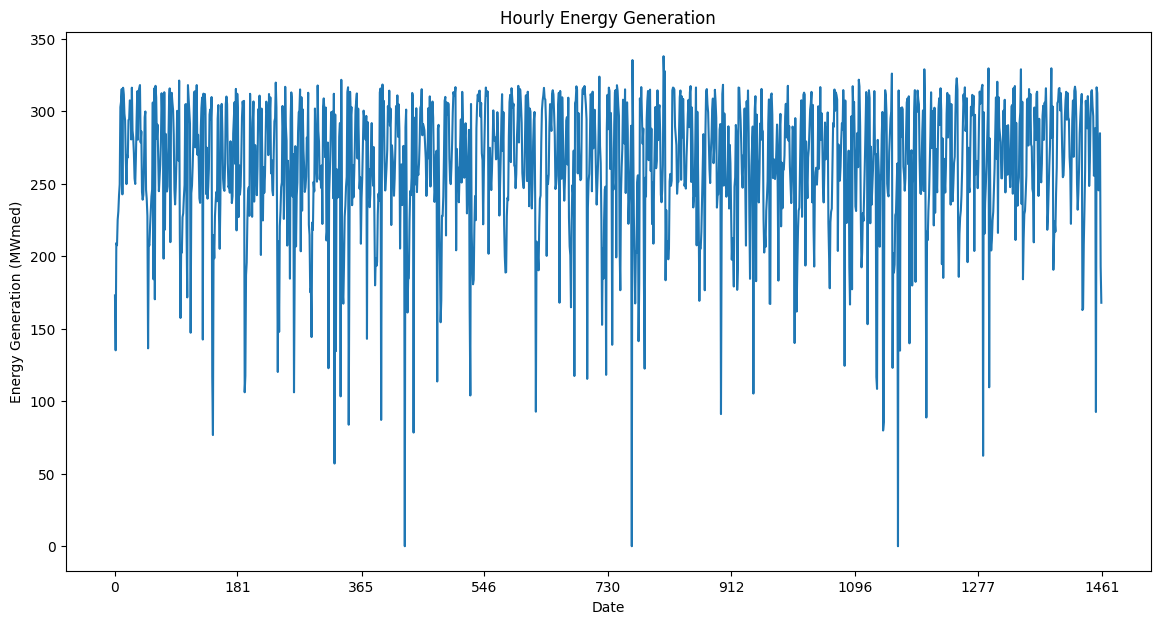

In [73]:

plt.figure(figsize=(14, 7))
plt.plot(df_avg.index,df_avg['val_geracao'], label='Energy Generation')
locator = mdates.AutoDateLocator(minticks=8, maxticks=10)
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
plt.title('Hourly Energy Generation')
plt.xlabel('Date')
plt.ylabel('Energy Generation (MWmed)')
plt.show()

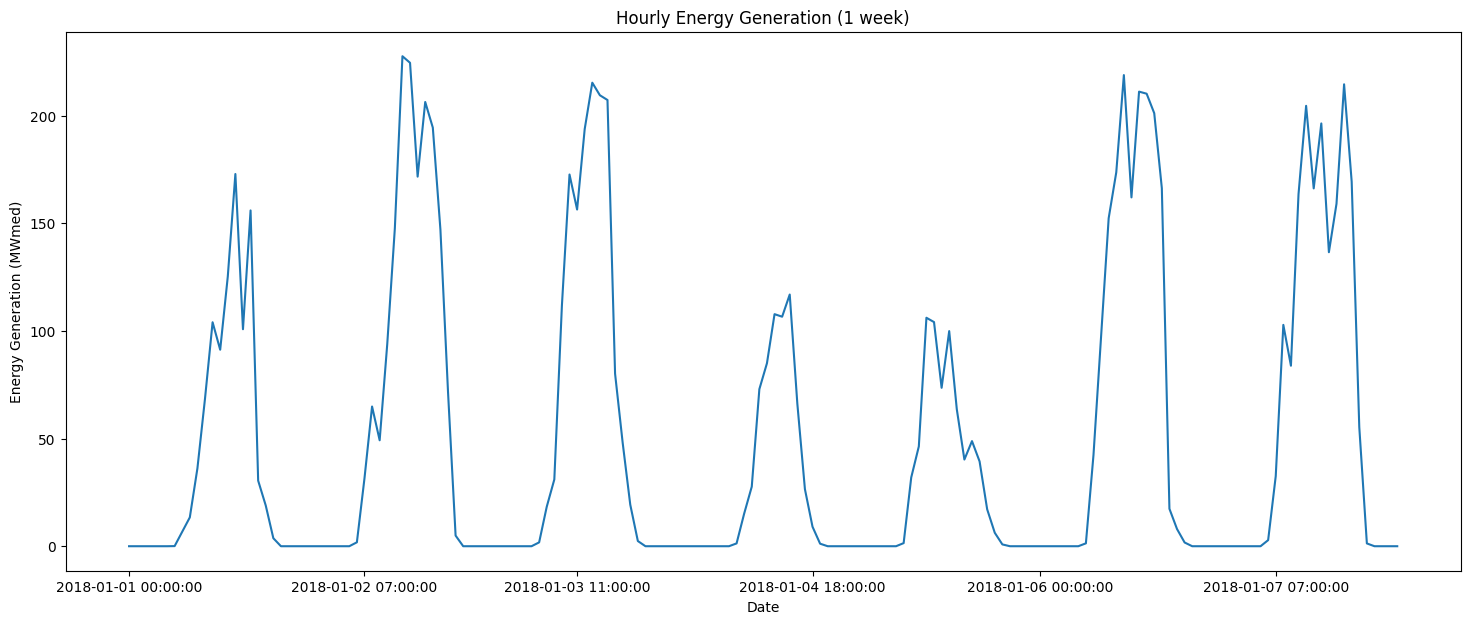

In [37]:
df_week = df[0:168].copy() #168
plt.figure(figsize=(18, 7))
plt.plot(df_week.index,df_week['val_geracao'], label='Energy Generation')
locator = mdates.AutoDateLocator(minticks=6, maxticks=10)
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
plt.title('Hourly Energy Generation (1 week)')
plt.xlabel('Date')
plt.ylabel('Energy Generation (MWmed)')
plt.show()

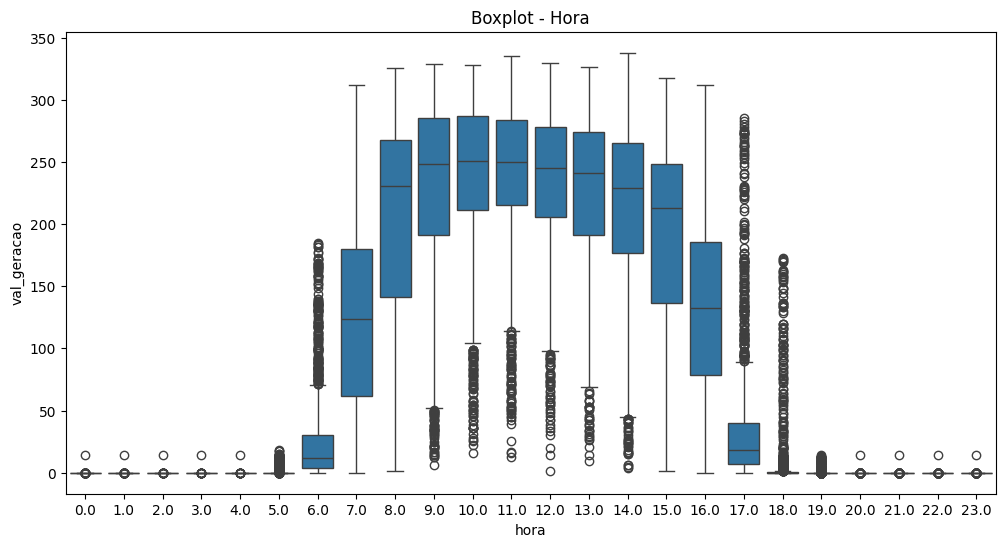

In [38]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df, x='hora', y='val_geracao')
ax.set_title('Boxplot - Hora')
plt.show()

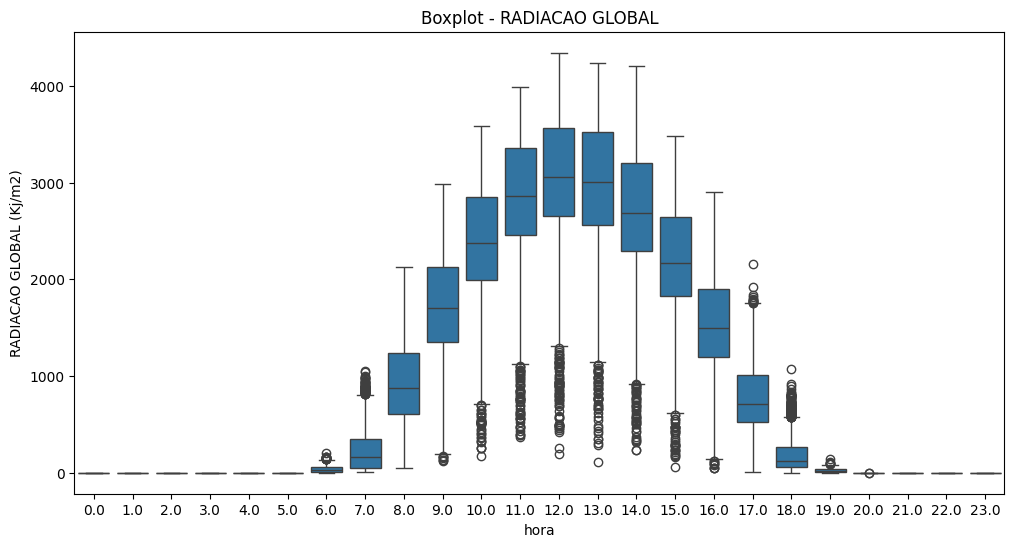

In [40]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df, x='hora', y='RADIACAO GLOBAL (Kj/m2)')
ax.set_title('Boxplot - RADIACAO GLOBAL')
plt.show()

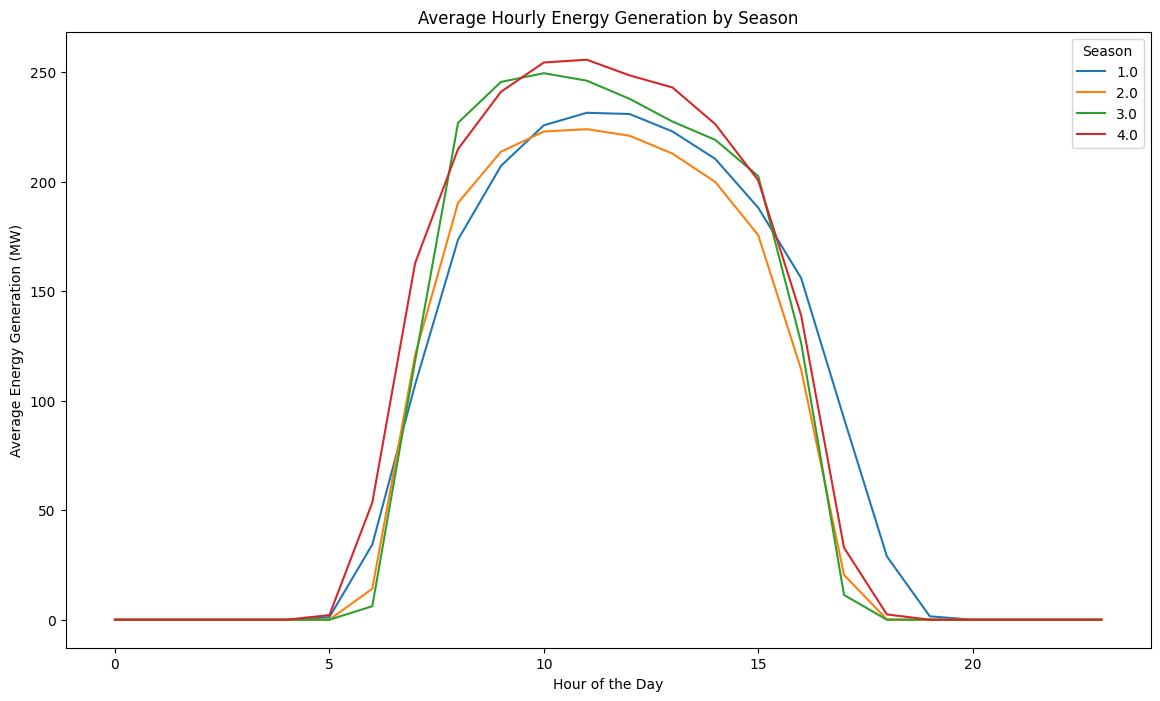

In [41]:
stats = df.groupby(['hora', 'estacao'])['val_geracao'].agg('mean').reset_index()
plt.figure(figsize=(14, 8))
sns.lineplot(data=stats, x='hora', y='val_geracao', hue='estacao', palette='tab10')
plt.title('Average Hourly Energy Generation by Season')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Energy Generation (MW)')
plt.legend(title='Season')
plt.show()
#Verão 1
#Outono 2
#Inverno 3
#Primavera 4


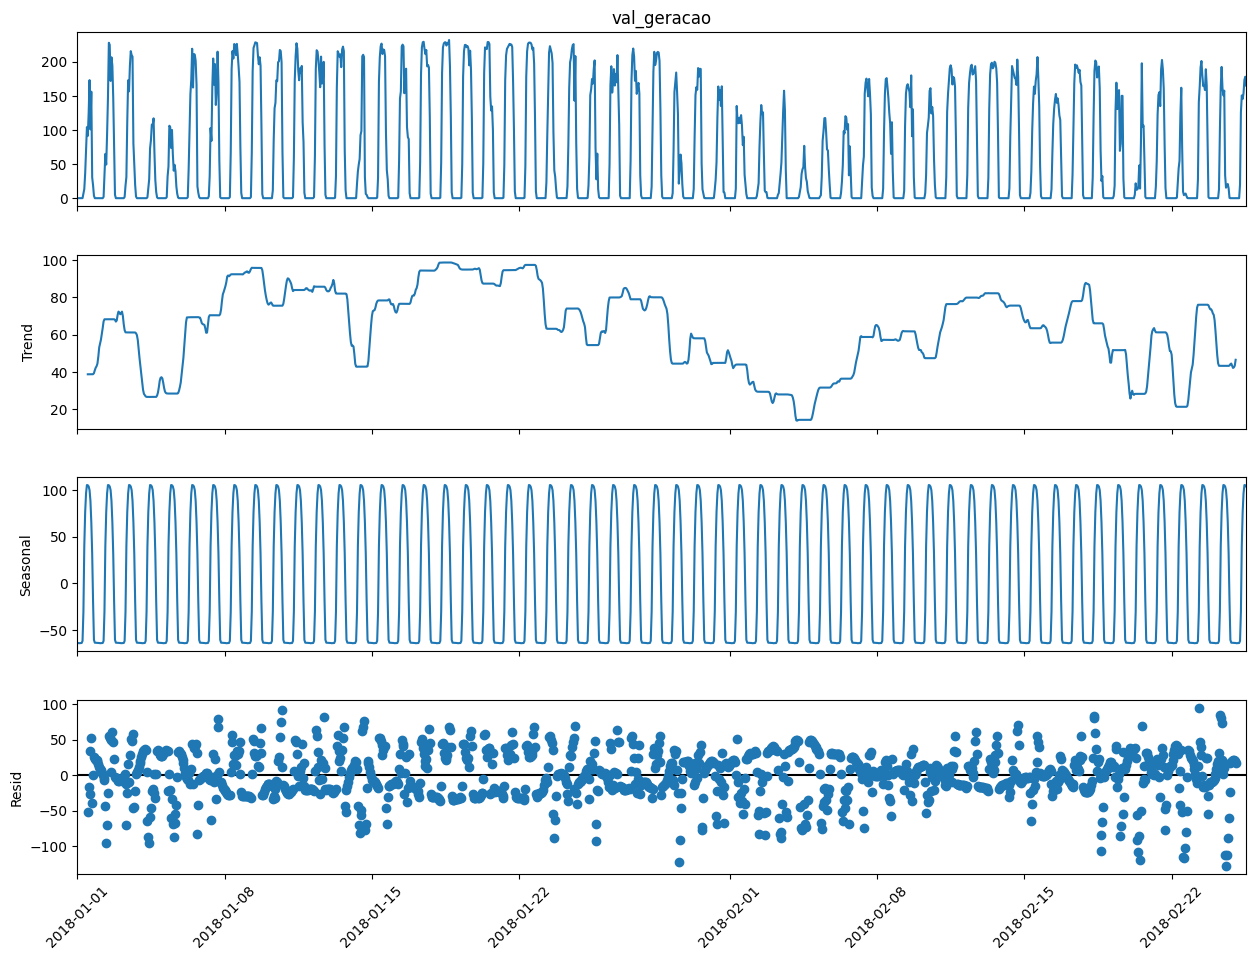

In [54]:
decomposition = seasonal_decompose(df[:1334]['val_geracao'], model='additive', period=24) #2 semanas
fig = decomposition.plot()
fig.set_size_inches(14, 10)
for ax in fig.axes:
    ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=8, maxticks=10))
    ax.tick_params(axis='x', rotation=45)
plt.show()

# Explanatory / Terget Correlation

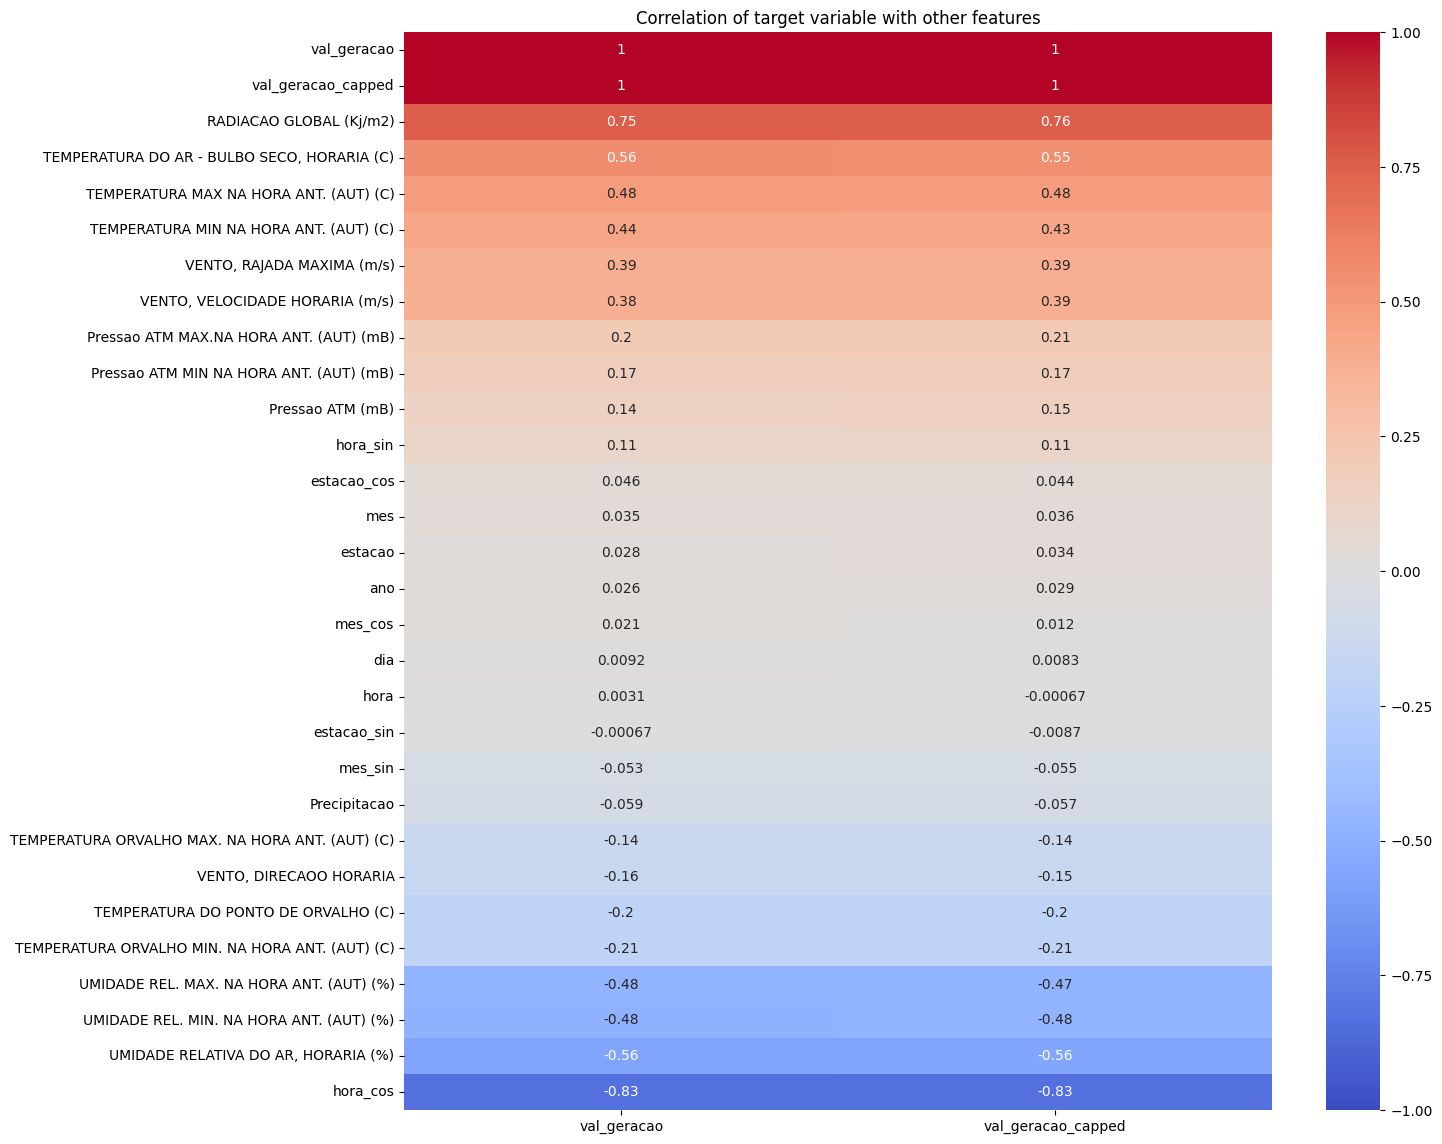

In [45]:
target_variables = ['val_geracao','val_geracao_capped']
df_corr = df.copy()

df_corr['hora_cos'] = np.cos(2 * np.pi * df_corr['hora'] / 24)
df_corr['hora_sin'] = np.sin(2 * np.pi * df_corr['hora'] / 24)
df_corr['mes_sin'] = np.sin(2 * np.pi * df_corr['mes'] / 12)
df_corr['mes_cos'] = np.cos(2 * np.pi * df_corr['mes'] / 12)
df_corr['estacao_sin'] = np.sin(2 * np.pi * df_corr['estacao'] / 4)
df_corr['estacao_cos'] = np.cos(2 * np.pi * df_corr['estacao'] / 4)
corr_matrix = df_corr.corr()
target_corr = corr_matrix[target_variables].sort_values(by=target_variables, ascending=False)
plt.figure(figsize=(14, 14))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Correlation of target variable with other features')
plt.show()

# Missing data

In [46]:
# For loop to iterate over columns and print the number of NaN values
for column in df.columns:
    num_nans = df[column].isna().sum()
    print(f'Column: {column}, Number of NaNs: {num_nans}')
    print(df[column].describe())
    print('\n\n')
for column in df.columns:
    df[column] = df[column].interpolate(method='linear')

Column: val_geracao, Number of NaNs: 76
count   34988.00
mean       87.87
std       112.10
min         0.00
25%         0.00
50%         3.12
75%       201.88
max       337.80
Name: val_geracao, dtype: float64



Column: hora, Number of NaNs: 76
count   34988.00
mean       11.50
std         6.92
min         0.00
25%         5.75
50%        11.00
75%        17.00
max        23.00
Name: hora, dtype: float64



Column: dia, Number of NaNs: 76
count   34988.00
mean       15.73
std         8.80
min         1.00
25%         8.00
50%        16.00
75%        23.00
max        31.00
Name: dia, dtype: float64



Column: mes, Number of NaNs: 76
count   34988.00
mean        6.52
std         3.45
min         1.00
25%         4.00
50%         7.00
75%        10.00
max        12.00
Name: mes, dtype: float64



Column: ano, Number of NaNs: 76
count   34988.00
mean     2019.50
std         1.12
min      2018.00
25%      2019.00
50%      2019.00
75%      2020.00
max      2021.00
Name: ano, dtype: float64


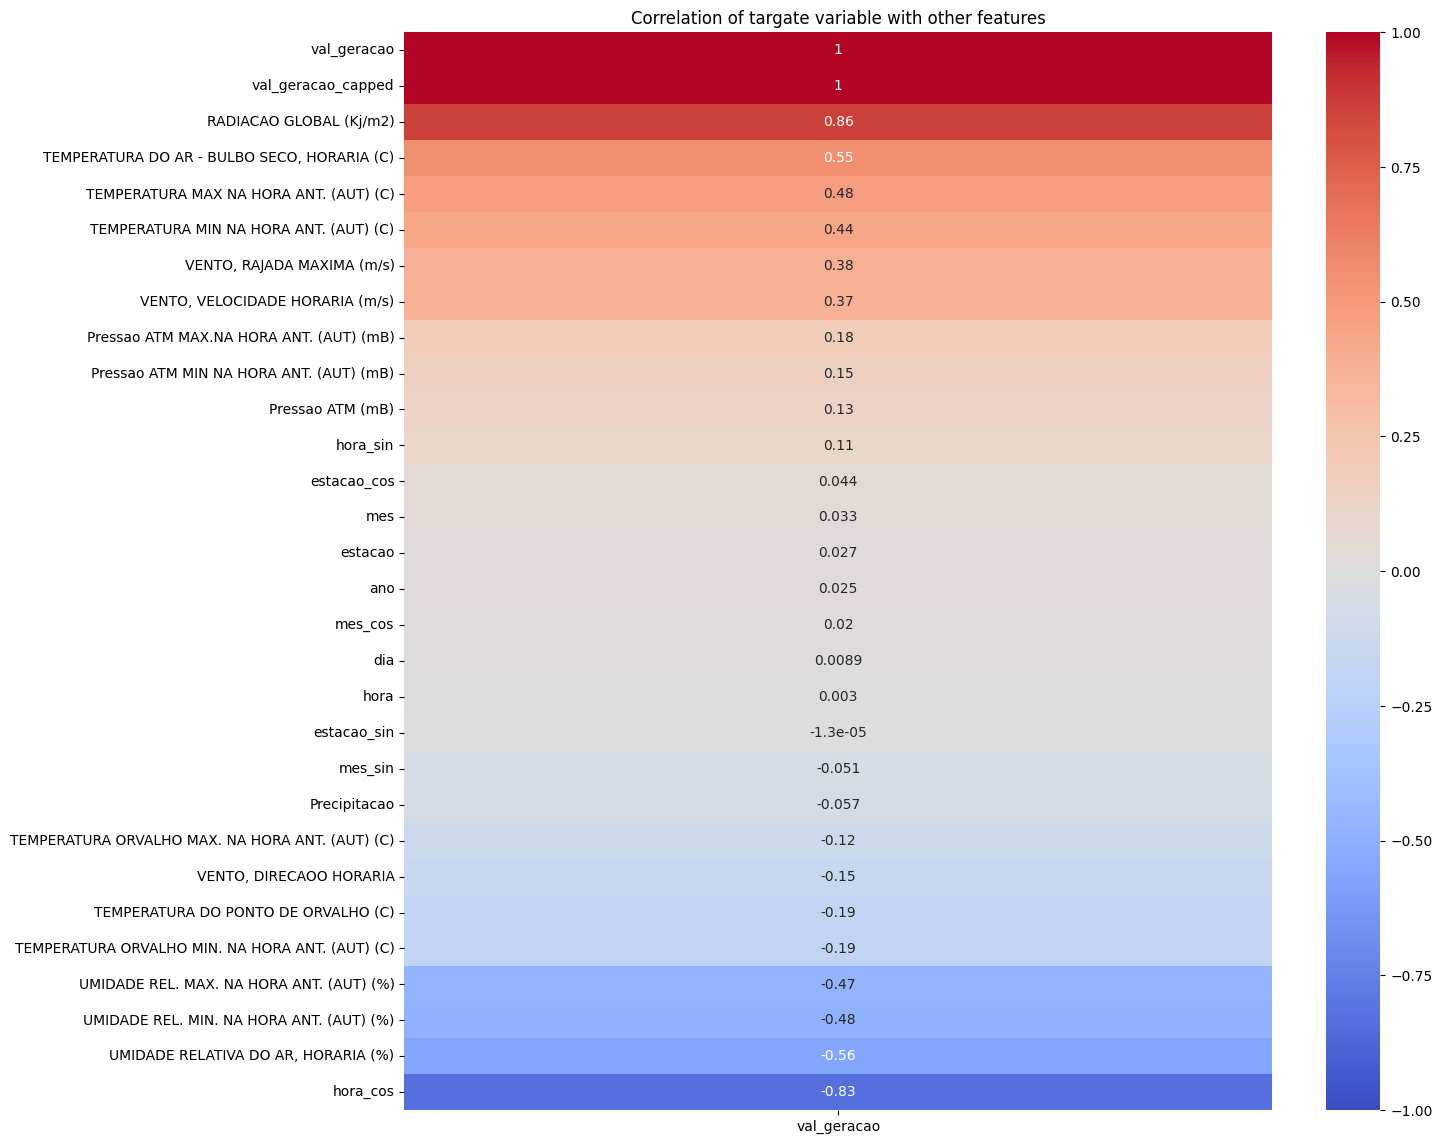

In [47]:
target_variables = ['val_geracao']
df_corr = df.copy()

df_corr['hora_cos'] = np.cos(2 * np.pi * df_corr['hora'] / 24)
df_corr['hora_sin'] = np.sin(2 * np.pi * df_corr['hora'] / 24)
df_corr['mes_sin'] = np.sin(2 * np.pi * df_corr['mes'] / 12)
df_corr['mes_cos'] = np.cos(2 * np.pi * df_corr['mes'] / 12)
df_corr['estacao_sin'] = np.sin(2 * np.pi * df_corr['estacao'] / 4)
df_corr['estacao_cos'] = np.cos(2 * np.pi * df_corr['estacao'] / 4)
corr_matrix = df_corr.corr()
target_corr = corr_matrix[target_variables].sort_values(by=target_variables, ascending=False)
plt.figure(figsize=(14, 14))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Correlation of targate variable with other features')
plt.show()

In [48]:
target_corr = corr_matrix[target_variables[0]].sort_values(ascending=False)
columns_to_drop = target_corr[abs(target_corr) < 0.3].index
columns_to_drop = [col for col in columns_to_drop if col not in target_variables]
df = df_corr.drop(columns=columns_to_drop)

In [49]:
for column in df.columns:
    num_nans = df[column].isna().sum()
    print(f'Column: {column}, Number of NaNs: {num_nans}')
    print(df[column].describe())
    print('\n\n')

Column: val_geracao, Number of NaNs: 0
count   35064.00
mean       87.67
std       112.06
min         0.00
25%         0.00
50%         2.96
75%       201.56
max       337.80
Name: val_geracao, dtype: float64



Column: RADIACAO GLOBAL (Kj/m2), Number of NaNs: 6
count   35058.00
mean      917.70
std      1167.66
min         0.00
25%        51.40
50%       187.45
75%      1741.92
max      4343.30
Name: RADIACAO GLOBAL (Kj/m2), dtype: float64



Column: TEMPERATURA DO AR - BULBO SECO, HORARIA (C), Number of NaNs: 0
count   35064.00
mean       24.22
std         5.06
min         8.80
25%        21.10
50%        23.70
75%        27.90
max        40.40
Name: TEMPERATURA DO AR - BULBO SECO, HORARIA (C), dtype: float64



Column: TEMPERATURA MAX NA HORA ANT. (AUT) (C), Number of NaNs: 0
count   35064.00
mean       25.01
std         5.17
min         9.20
25%        21.60
50%        24.50
75%        28.90
max        41.20
Name: TEMPERATURA MAX NA HORA ANT. (AUT) (C), dtype: float64



Column: TE

In [50]:
df.fillna(0, inplace=True)
df.drop(columns ='val_geracao_capped', inplace = True)
df.to_csv('file_path\\consolidated_treated.csv')